# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [1]:
!pip install pandas

In [2]:
!pip install keras

In [3]:
!pip install scikit-learn

In [4]:
!pip install seaborn

In [5]:
import pandas as pd

df = pd.read_csv('pollution_dataset.csv')

In [6]:
df.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [7]:
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Air Quality'] = encoder.fit_transform(df['Air Quality'].astype(str).values.ravel())

In [9]:
df.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [10]:
from sklearn.model_selection import train_test_split

X, Y = df.drop(columns=['Air Quality']), df['Air Quality']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

## Simple Feedforward Network


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, LSTM

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X.shape[1]

9

In [13]:
model1 = Sequential([
    Input(shape=(9,)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(8, kernel_initializer="uniform", activation="relu"),
    Dense(1, kernel_initializer="uniform", activation="sigmoid"),
])

In [14]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [16]:
history1 = model1.fit(X_train, Y_train, validation_split=0.1, epochs=32, batch_size=8)

Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1042 - loss: -2.4969 - val_accuracy: 0.1227 - val_loss: -70.3596
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1133 - loss: -287.5536 - val_accuracy: 0.1227 - val_loss: -1323.0298
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0953 - loss: -2535.3665 - val_accuracy: 0.1227 - val_loss: -6373.3018
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0975 - loss: -11110.3252 - val_accuracy: 0.1227 - val_loss: -18600.4902
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1012 - loss: -25457.1074 - val_accuracy: 0.1227 - val_loss: -41924.7031
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1052 - loss: -62543.6172 - val_accuracy: 0.1227 - val_loss: -78036.7109
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0969 - loss: -109601.6641 - val_accuracy: 0.1227 - val_loss: -131718.1250
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1

<Axes: >

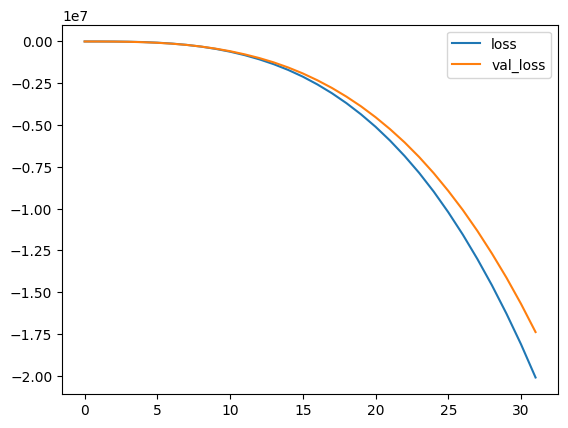

In [17]:
import seaborn as sns

sns.lineplot(history1.history['loss'], label='loss')
sns.lineplot(history1.history['val_loss'], label='val_loss')

In [18]:
model2 = Sequential([
    Input(shape=(9,)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dropout(0.1),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(1, kernel_initializer="uniform", activation="linear"),
])

In [29]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model2.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"]
)

In [30]:
history2 = model2.fit(X_train, Y_train, validation_split=0.1, epochs=64, batch_size=8)

Epoch 1/64
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8481 - mean_squared_error: 1.8481 - val_loss: 0.6757 - val_mean_squared_error: 0.6757
Epoch 2/64
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5741 - mean_squared_error: 0.5741 - val_loss: 0.5518 - val_mean_squared_error: 0.5518
Epoch 3/64
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5016 - mean_squared_error: 0.5016 - val_loss: 0.4481 - val_mean_squared_error: 0.4481
Epoch 4/64
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4537 - mean_squared_error: 0.4537 - val_loss: 0.3906 - val_mean_squared_error: 0.3906
Epoch 5/64
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4115 - mean_squared_error: 0.4115 - val_loss: 0.3613 - val_mean_squared_error: 0.3613
Epoch 6/64
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3637 - mean_squared_error: 0.3637 - val_loss: 0.3220 - val_mean_squared_error: 0.3220
Epoch 7/64
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3467 - mean_squared_error: 0.3467 - val_loss: 0.30

<Axes: >

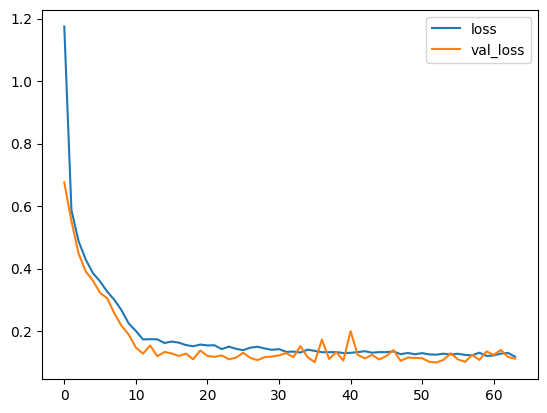

In [31]:
sns.lineplot(history2.history['loss'], label='loss')
sns.lineplot(history2.history['val_loss'], label='val_loss')

In [33]:
model3 = Sequential([
    Input(shape=(9,)),
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(4, activation="softmax")
])
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [34]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,076 (8.11 KB)

 Trainable params: 2,076 (8.11 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model3.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"]
)

In [36]:
history3 = model3.fit(X_train, Y_train, validation_split=0.1, epochs=50, batch_size=16)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5337 - mean_squared_error: 2.5337 - val_loss: 2.2918 - val_mean_squared_error: 2.2918
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3753 - mean_squared_error: 2.3753 - val_loss: 2.2918 - val_mean_squared_error: 2.2918
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4564 - mean_squared_error: 2.4564 - val_loss: 2.2918 - val_mean_squared_error: 2.2918
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5254 - mean_squared_error: 2.5254 - val_loss: 2.2918 - val_mean_squared_error: 2.2918
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4967 - mean_squared_error: 2.4967 - val_loss: 2.2918 - val_mean_squared_error: 2.2918
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4951 - mean_squared_error: 2.4951 - val_loss: 2.2918 - val_mean_squared_error: 2.2918
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4807 - mean_squared_error: 2.4807 - val_loss: 2.29

<Axes: >

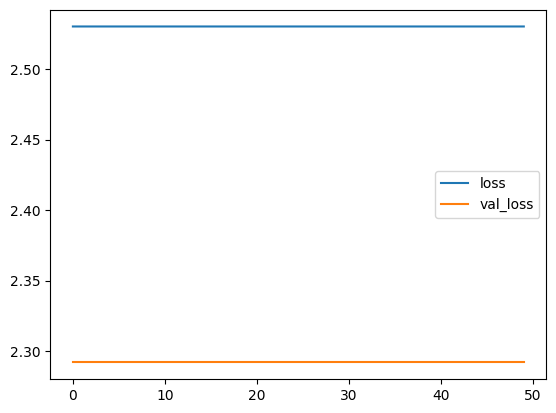

In [37]:
sns.lineplot(history3.history['loss'], label='loss')
sns.lineplot(history3.history['val_loss'], label='val_loss')